In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
df=pd.read_csv('C:/Users/William Wallace/Desktop/carpeta visual/semana_9/IMDBDatasetSPANISH.csv')
print (df.head())

   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment sentimiento  
0  Uno de los otros críticos ha mencionado que de...  positive    positivo  
1  Una pequeña pequeña producción.La técnica de f...  positive    positivo  
2  Pensé que esta era una manera maravillosa de p...  positive    positivo  
3  Básicamente, hay una familia donde un niño peq...  negative    negativo  
4  El "amor en el tiempo" de Petter Mattei es una...  positive    positivo  


In [ ]:
review =[]
sentences =list(df['review_es'])
for sen in sentences:
    review.append(sen)

labels = df['sentimiento']
labels =np.array(list (map(lambda x:1 if x=="positivo" else 0,labels)))


train_sentences,test_sentences,train_labels,test_labels = train_test_split(review,labels,test_size=0.20)

vocab_size =1000
max_length=120
embedding_dim=16
trunc_type="post"
padding_type='post'
oov_tok="<OOV>"

# Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index


#generacion secuencia de tokenizadas

secuencias = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(secuencias,maxlen=max_length,truncating=trunc_type)
#rellena las secuencias a una longitud uniforme


test_secuencias=tokenizer.texts_to_sequences(test_sentences)
test_padded = keras.preprocessing.sequence.pad_sequences (test_secuencias,maxlen=max_length,truncating=trunc_type)

In [ ]:
#modelos

model2 = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64,return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])


#con 6 da 0,80



C:\Users\William Wallace\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#resumen model01
#resumen del modelo2
#entrenamiento modelo2

#entrenamiento del modelo
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 115ms/step - accuracy: 0.6008 - loss: 0.6562 - val_accuracy: 0.4968 - val_loss: 0.6929
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 150ms/step - accuracy: 0.5189 - loss: 0.6863 - val_accuracy: 0.7210 - val_loss: 0.5834
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 189s 151ms/step - accuracy: 0.6526 - loss: 0.6271 - val_accuracy: 0.7078 - val_loss: 0.6204
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 148ms/step - accuracy: 0.6283 - loss: 0.6244 - val_accuracy: 0.7257 - val_loss: 0.5554
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 186s 149ms/step - accuracy: 0.7492 - loss: 0.5209 - val_accuracy: 0.7698 - val_loss: 0.4747
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 149ms/step - accuracy: 0.7877 - loss: 0.4501 - val_accuracy: 0.7867 - val_loss: 0.4515
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 176s 141ms/step - accuracy: 0.7951 - loss: 0.4360 - val_accuracy: 0.7927 - val_loss: 0.4402
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - ac

<Axes: >

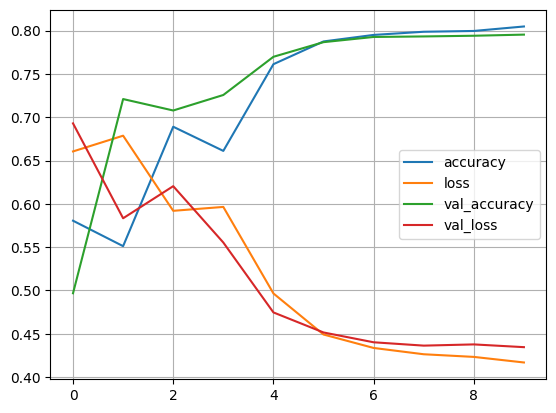

In [ ]:
#entrenamiento modelo1
num_epocas= 10

#entrenamiento modelo2

history2 = model2.fit(
padded,train_labels,epochs=num_epocas,validation_data=(test_padded,test_labels)
)
#graficar model1
pd.DataFrame(history2.history).plot(grid=True)
#entrenamiento modelo2


313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step


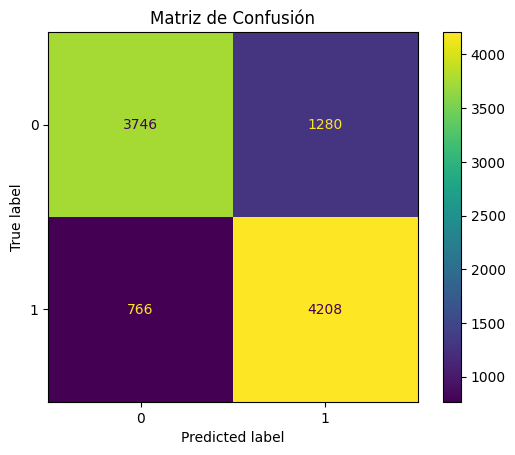

F1 Score: 0.8044350984515389
AUC-ROC: 0.881006422413662


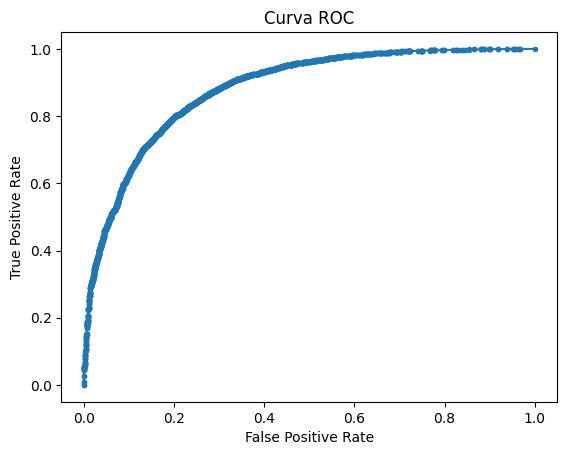

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model2.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()